In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

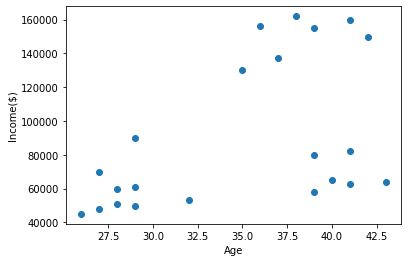

In [3]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [4]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [5]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [8]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

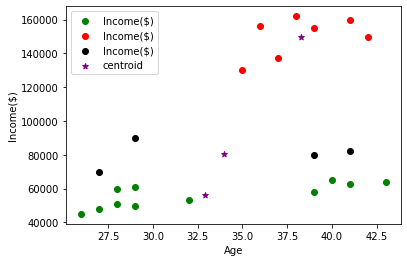

In [9]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Income($)'],color = 'green',label = 'Income($)')
plt.scatter(df2.Age,df2['Income($)'],color = 'red',label = 'Income($)')
plt.scatter(df3.Age,df3['Income($)'],color = 'black',label = 'Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color= 'purple',marker = '*',label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()


### Preprocessing using min max scaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [11]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


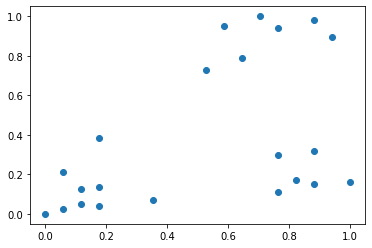

In [12]:
plt.scatter(df.Age,df['Income($)'])

In [13]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [14]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [15]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

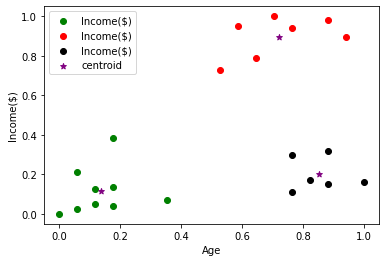

In [16]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Income($)'],color = 'green',label = 'Income($)')
plt.scatter(df2.Age,df2['Income($)'],color = 'red',label = 'Income($)')
plt.scatter(df3.Age,df3['Income($)'],color = 'black',label = 'Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color= 'purple',marker = '*',label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()





### Elbow Plot

In [17]:
sse = []
k_range  = range(1,10)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\raj\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


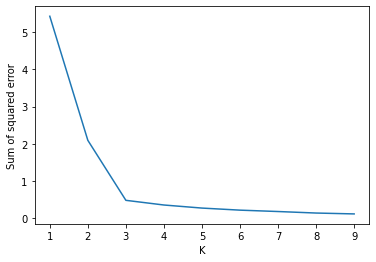

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

## Exercise

In [31]:
from sklearn.datasets import load_iris

In [32]:
iris = load_iris()

In [33]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [34]:
df = pd.DataFrame(iris.data,columns  = iris.feature_names)

In [35]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
df['target']= iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
df['target_names'] = df.target.apply(lambda x : iris.target_names[x])

In [38]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [42]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [43]:
df.drop(['sepal length (cm)','sepal width (cm)'],axis = 1, inplace = True)

In [44]:
df.head()

,petal length (cm),petal width (cm),target,target_names
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa


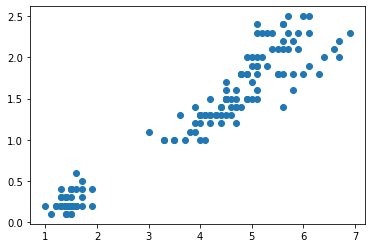

In [45]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [61]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),target,target_names,cluster
0,0.067797,0.2,0,setosa,0
1,0.067797,0.2,0,setosa,0
2,0.050847,0.2,0,setosa,0
3,0.084746,0.2,0,setosa,0
4,0.067797,0.2,0,setosa,0


In [63]:
km.cluster_centers_

array([[0.07830508, 0.246     ],
       [0.77316985, 2.06595745],
       [0.56347937, 1.33018868]])

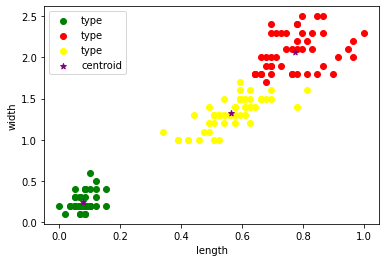

In [67]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'green',label = 'type')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'red',label= 'type')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color = 'yellow',label= 'type')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker = '*',label = 'centroid')
plt.xlabel('length')
plt.ylabel('width')
plt.legend()

In [68]:
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']= scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal length (cm)']])
df['petal width (cm)']= scaler.transform(df[['petal width (cm)']])




In [69]:
df.head()

,petal length (cm),petal width (cm),target,target_names,cluster
0,0.067797,0.2,0,setosa,0
1,0.067797,0.2,0,setosa,0
2,0.050847,0.2,0,setosa,0
3,0.084746,0.2,0,setosa,0
4,0.067797,0.2,0,setosa,0


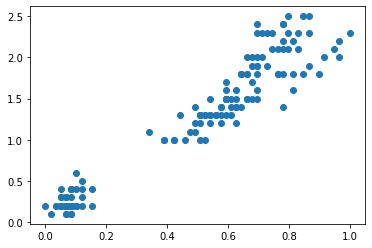

In [70]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [71]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

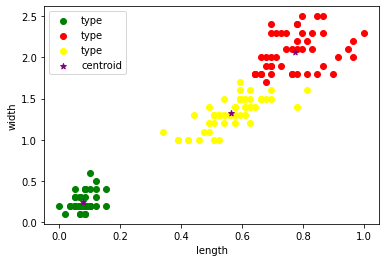

In [72]:
df1 = df[df.cluster ==0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'green',label = 'type')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'red',label= 'type')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color = 'yellow',label= 'type')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker = '*',label = 'centroid')
plt.xlabel('length')
plt.ylabel('width')
plt.legend()

# Elbow plot

In [73]:
sse = []
k_range = range(1,6)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

C:\Users\raj\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


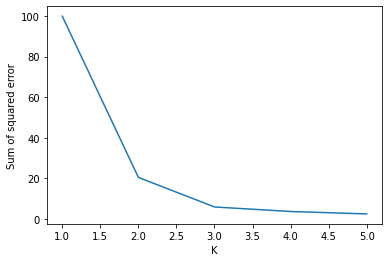

In [74]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)